In [1]:
import numpy as np
from Network import Network
import matplotlib.pyplot as plt

Epoch #: 100 | Most Recent Error" 0.011305624414072344
Epoch #: 200 | Most Recent Error" 2.255234749954767e-05
Epoch #: 300 | Most Recent Error" 1.8922199005325631e-06
Epoch #: 400 | Most Recent Error" 1.1961667926652715e-05
Epoch #: 500 | Most Recent Error" 0.001296987083014665
Epoch #: 600 | Most Recent Error" 4.5283300907248624e-08
Epoch #: 700 | Most Recent Error" 0.0007881142351122894
Epoch #: 800 | Most Recent Error" 0.0007400638089016397
Epoch #: 900 | Most Recent Error" 1.5666219654773237e-06
Epoch #: 1000 | Most Recent Error" 0.0005223913930969996
The Binary Classification Model has an accuracy of 100.0%


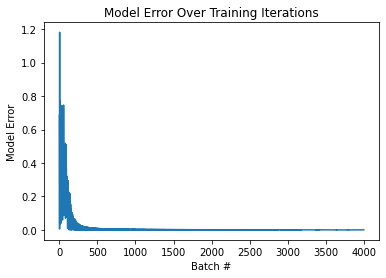

array([[ 7.14811640e-04],
       [ 7.14811640e-04],
       [ 9.77191606e-01],
       [ 9.77191606e-01],
       [ 9.76081648e-01],
       [ 9.76081648e-01],
       [-7.54424580e-04],
       [ 9.76081648e-01],
       [-7.54424580e-04]])

In [2]:
# setting up test/train data arrays #CLEAN UP AND CHECK FOR ACCURACY
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_train = np.array([[0], [1], [1], [0]])
Y_train_2 = np.array([[0], [0], [0], [1]])
X_test = np.array([[0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 1], [1, 0], [1, 1]])
Y_test = np.array([[0], [0], [1], [1], [1], [1], [0], [1], [0]])
Y_test_2 = np.array([[0], [0], [0], [0], [0], [0], [1], [0], [1]])


# creating model object
model = Network('mse', X_train, Y_train, X_test, Y_test, x_features=2, epoch_num=1000,
                layer_num=2, layer_depths=[3,1], learn_rate=0.1,print_error_iteration=100)

model.add_Layer('tanhyp', 'initial_hidden')

# adding output layer
model.add_Layer('tanhyp', 'output')

# training model
model.train()

# plotting model error while training
model.plot_train_error(print_error=False)

# testing model classification abilities
model.test_binary_classification()

#showing model prediction for a given input vector
model.predict(X_test)

In [3]:
#optimized homebrew model params
print(model)

Network trained with mse Cost Function. Layers: 
[Initial_Hidden Layer with 3 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[-0.3130539  -0.48186855]
 [-1.77070535  1.51933505]
 [ 1.86844944 -1.96458498]] 
 Next Layer in the NN is 1 Neurons Deep
 Output Layer with 1 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[ 0.97251581 -1.90831403 -1.90302998]]]


In [4]:
from sklearn.neural_network import MLPClassifier

skl_model = MLPClassifier(hidden_layer_sizes = (3) ,activation='tanh',solver ='sgd',batch_size=1,learning_rate_init=0.1,max_iter=1000,momentum=0)
skl_model.fit(X_train,Y_train.flatten())

score = skl_model.score(X_test, Y_test.flatten())
print(f'Model Achieves an test accuracy of {score*100}%')

Model Achieves an test accuracy of 100.0%


[array([[ 2.37876848, -3.30909689, -0.4059079 ],
       [ 1.94677979, -3.51573539,  1.54213966]]), array([[-4.34554847],
       [-4.7850873 ],
       [-1.74417258]])]


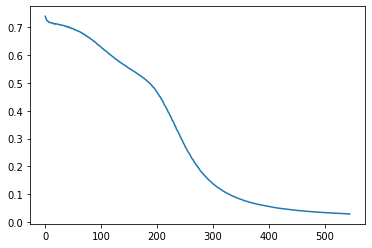

In [5]:
#printing optimal model parameters
optimized_model_params = skl_model.coefs_
print(optimized_model_params)

#showing the model loss curve


loss_curve = skl_model.loss_curve_

plt.plot(np.arange(len(loss_curve)),loss_curve)
plt.show()

In [6]:
#mking predictions using the model
skl_model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 0])